In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open ('chat.txt', encoding = 'utf-8') as f:
    chat = f.read()
           

In [3]:
chat

'[17:28, 01/03/2024] +55 21 98345-9819: 🌱 Semeadores, desejamos um excelente final de semana e bom descanso! Voltamos com nossas trocas na segunda-feira do dia 04/03. \nUm grande abraço! 💚\n[12:03, 05/03/2024] +55 54 9625-1561: Bom dia, gente, estou fazendo a leitura de um livro na árvore, e coloquei para escutar, mas o áudio está em português de Portugal. Como que muda?\n[12:20, 05/03/2024] +55 55 8427-8123: Você esta usando cromebook?\n[12:21, 05/03/2024] +55 54 9625-1561: sim\n[12:21, 05/03/2024] +55 54 9625-1561: no meu note estava normal, entrei com o chrome e deu nisso\n[12:22, 05/03/2024] +55 55 8427-8123: Vc troca no crome  no canto  direito  e troca para português brasil\n[12:24, 05/03/2024] +55 54 9625-1561: No traduzir?\n[12:26, 05/03/2024] +55 55 8427-8123: Nas configurações  do crome\n[12:28, 05/03/2024] +55 54 9625-1561: Mas está em português (Brasil)\n[12:30, 05/03/2024] +55 55 8427-8123: É no cromebook\n[12:30, 05/03/2024] +55 55 8427-8123: Não no navegador 😊\n[12:31, 0

In [4]:
pattern = re.compile(r'\[(\d{2}:\d{2}), (\d{2}/\d{2}/\d{4})\] (.+?): (.*)')
raw = pattern.findall(chat)


In [5]:
raw

[('17:28',
  '01/03/2024',
  '+55 21 98345-9819',
  '🌱 Semeadores, desejamos um excelente final de semana e bom descanso! Voltamos com nossas trocas na segunda-feira do dia 04/03. '),
 ('12:03',
  '05/03/2024',
  '+55 54 9625-1561',
  'Bom dia, gente, estou fazendo a leitura de um livro na árvore, e coloquei para escutar, mas o áudio está em português de Portugal. Como que muda?'),
 ('12:20', '05/03/2024', '+55 55 8427-8123', 'Você esta usando cromebook?'),
 ('12:21', '05/03/2024', '+55 54 9625-1561', 'sim'),
 ('12:21',
  '05/03/2024',
  '+55 54 9625-1561',
  'no meu note estava normal, entrei com o chrome e deu nisso'),
 ('12:22',
  '05/03/2024',
  '+55 55 8427-8123',
  'Vc troca no crome  no canto  direito  e troca para português brasil'),
 ('12:24', '05/03/2024', '+55 54 9625-1561', 'No traduzir?'),
 ('12:26', '05/03/2024', '+55 55 8427-8123', 'Nas configurações  do crome'),
 ('12:28', '05/03/2024', '+55 54 9625-1561', 'Mas está em português (Brasil)'),
 ('12:30', '05/03/2024', '+55

In [6]:
chat_processed = pd.DataFrame(raw, columns = ['Time', 'Date', 'Person','Message'])
chat_processed


,Time,Date,Person,Message
0,17:28,01/03/2024,+55 21 98345-9819,"🌱 Semeadores, desejamos um excelente final de ..."
1,12:03,05/03/2024,+55 54 9625-1561,"Bom dia, gente, estou fazendo a leitura de um ..."
2,12:20,05/03/2024,+55 55 8427-8123,Você esta usando cromebook?
3,12:21,05/03/2024,+55 54 9625-1561,sim
4,12:21,05/03/2024,+55 54 9625-1561,"no meu note estava normal, entrei com o chrome..."
...,...,...,...,...
138,11:59,27/03/2024,+55 55 9685-3138,Um livro
139,12:00,27/03/2024,+55 55 9685-3138,Esses que são baixados podem ser lidos offline
140,12:31,27/03/2024,+55 53 9978-1414,E vai contabilizar pontos?
141,12:32,27/03/2024,Mariane,"Isso mesmo, Suiene! Obrigada por compartilhar!"


In [7]:
df_new = chat_processed.drop('Person', axis = 1)
df_new


,Time,Date,Message
0,17:28,01/03/2024,"🌱 Semeadores, desejamos um excelente final de ..."
1,12:03,05/03/2024,"Bom dia, gente, estou fazendo a leitura de um ..."
2,12:20,05/03/2024,Você esta usando cromebook?
3,12:21,05/03/2024,sim
4,12:21,05/03/2024,"no meu note estava normal, entrei com o chrome..."
...,...,...,...
138,11:59,27/03/2024,Um livro
139,12:00,27/03/2024,Esses que são baixados podem ser lidos offline
140,12:31,27/03/2024,E vai contabilizar pontos?
141,12:32,27/03/2024,"Isso mesmo, Suiene! Obrigada por compartilhar!"


In [8]:
df_new.shape

(143, 3)

In [9]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer 
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mateus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mateus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
df_new.isnull()

,Time,Date,Message
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
138,False,False,False
139,False,False,False
140,False,False,False
141,False,False,False


In [11]:
analisador = SentimentIntensityAnalyzer()

In [12]:
def obter_sentimento(texto):
    polaridade = analisador.polarity_scores(texto)
    if polaridade['compound'] >= 0.05:
        return 'Positivo'
    elif polaridade['compound'] <= -0.05:
        return 'Negativo'
    else:
        return 'Neutro'

In [20]:
# Aplicar a função a cada linha do DataFrame
df_new['Sentimento'] = df_new['Message'].apply(obter_sentimento)

# Exibir o DataFrame resultante
df_new

,Time,Date,Message,Sentimento
0,17:28,01/03/2024,"🌱 Semeadores, desejamos um excelente final de ...",Neutro
1,12:03,05/03/2024,"Bom dia, gente, estou fazendo a leitura de um ...",Neutro
2,12:20,05/03/2024,Você esta usando cromebook?,Neutro
3,12:21,05/03/2024,sim,Neutro
4,12:21,05/03/2024,"no meu note estava normal, entrei com o chrome...",Negativo
...,...,...,...,...
138,11:59,27/03/2024,Um livro,Neutro
139,12:00,27/03/2024,Esses que são baixados podem ser lidos offline,Negativo
140,12:31,27/03/2024,E vai contabilizar pontos?,Neutro
141,12:32,27/03/2024,"Isso mesmo, Suiene! Obrigada por compartilhar!",Neutro


<AxesSubplot:>

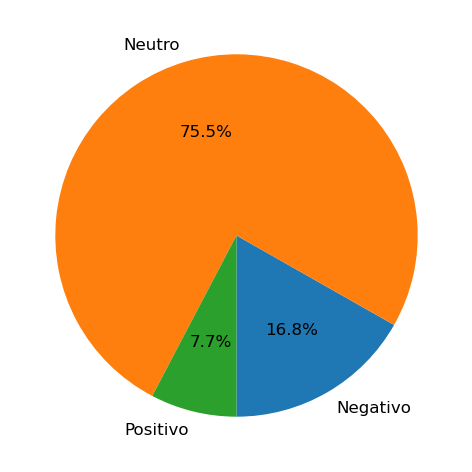

In [21]:
sentiment_counts = df_new.groupby(['Sentimento']).size()
sentiment_counts

#transformar em gráfico
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [16]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [17]:
#retirando os stopwords (artigos, sujeito...)
stop_words = set(stopwords.words('portuguese'))

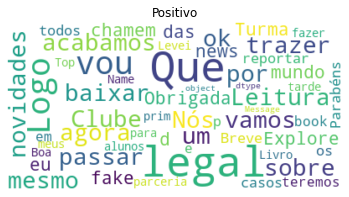

In [26]:
# Wordcloud with positive tweets
Positivo = df_new['Message'][df_new["Sentimento"] == 'Positivo']
stop_words = ["https", "co", "RT", "de", "O"] + list(STOPWORDS)
Positivo = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(Positivo))
plt.figure()
plt.title("Positivo")
plt.imshow(Positivo, interpolation="bilinear")
plt.axis("off")
plt.show()